In [ ]:
#Week 5 Assignment
#Programmer's name: Savannah Gourley
#For my portion of labor, I will be analyzing low birth weight in SPAs 1, 2, 4, 5, and 6 
#using CalEnviroScreen data. I will be producing 3 charts and 2 maps with one of the maps 
#being interactive. To interpret the data, I will mainly looking at the 'Low Birth Weight' 
#variable which tells me the percent all of births in each LA census tract were categorized 
#as low birth weight. 

In [ ]:
#Research Question: What contributes to food security and associated health outcomes at the community level in Los Angeles County?

In [1]:
###importing pandas/geopandas/folium/matplot/contextily
import pandas as pd
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
import contextily as ctx

In [ ]:
#importing CalEnviroScreen data containing Low Birth Weight data

In [2]:
calen2 = pd.read_excel('lbw data/CalEnviroscreen edited.xlsx')

In [77]:
#checking what the data is looking like 
calen2.head()

Keep      Keep.1  Census Tract  Total Population California County    ZIP  \
0     0  6037204920    6037204920              2751       Los Angeles  90023   
1     0  6037542402    6037542402              3306       Los Angeles  90221   
2     0  6037543202    6037543202              5124       Los Angeles  90220   
3     0  6037203300    6037203300              2000       Los Angeles  90033   
4     0  6037291220    6037291220              3640       Los Angeles  90247   

  Approximate Location   Longitude   Latitude  CES 4.0 Score  ...  \
0          Los Angeles -118.197497  34.017500          82.39  ...   
1              Compton -118.212413  33.881969          80.71  ...   
2              Compton -118.230032  33.879862          79.29  ...   
3          Los Angeles -118.207788  34.058872          77.35  ...   
4          Los Angeles -118.286709  33.877139          77.25  ...   

   Linguistic Isolation Pctl Poverty  Poverty Pctl  Unemployment  \
0                      81.55    62.6         93.39           6.4   
1                        NaN    43.5         74.05           9.3   
2                      60.62    56.8         88.92          12.6   
3                      94.87    71.7         97.95          11.9   
4                      86.75    51.5         83.49           4.5   

   Unemployment Pctl  Housing Burden  Housing Burden Pctl  Pop. Char.   \
0              61.53            20.3                63.97        83.75   
1              83.22            23.7                76.35        83.37   
2              93.49            29.6                89.84        85.44   
3              91.94            28.3                87.49        82.01   
4              37.71            26.1                82.79        74.47   

   Pop. Char. Score  Pop. Char. Pctl  
0              8.69            95.79  
1              8.65            95.46  
2              8.86            96.90  
3              8.51            94.49  
4              7.73            86.01  

[5 rows x 60 columns]

In [ ]:
#Leading zero problem per usual, let's fix that

In [3]:
calen2 = pd.read_excel(
    'lbw data/CalEnviroscreen edited.xlsx',
    dtype=
    {
        'Keep':str,
        'Census Tract':str
    }
)

In [79]:
#checking again
calen2.head()

Keep      Keep.1 Census Tract  Total Population California County    ZIP  \
0    0  6037204920  06037204920              2751       Los Angeles  90023   
1    0  6037542402  06037542402              3306       Los Angeles  90221   
2    0  6037543202  06037543202              5124       Los Angeles  90220   
3    0  6037203300  06037203300              2000       Los Angeles  90033   
4    0  6037291220  06037291220              3640       Los Angeles  90247   

  Approximate Location   Longitude   Latitude  CES 4.0 Score  ...  \
0          Los Angeles -118.197497  34.017500          82.39  ...   
1              Compton -118.212413  33.881969          80.71  ...   
2              Compton -118.230032  33.879862          79.29  ...   
3          Los Angeles -118.207788  34.058872          77.35  ...   
4          Los Angeles -118.286709  33.877139          77.25  ...   

   Linguistic Isolation Pctl Poverty  Poverty Pctl  Unemployment  \
0                      81.55    62.6         93.39           6.4   
1                        NaN    43.5         74.05           9.3   
2                      60.62    56.8         88.92          12.6   
3                      94.87    71.7         97.95          11.9   
4                      86.75    51.5         83.49           4.5   

   Unemployment Pctl  Housing Burden  Housing Burden Pctl  Pop. Char.   \
0              61.53            20.3                63.97        83.75   
1              83.22            23.7                76.35        83.37   
2              93.49            29.6                89.84        85.44   
3              91.94            28.3                87.49        82.01   
4              37.71            26.1                82.79        74.47   

   Pop. Char. Score  Pop. Char. Pctl  
0              8.69            95.79  
1              8.65            95.46  
2              8.86            96.90  
3              8.51            94.49  
4              7.73            86.01  

[5 rows x 60 columns]

In [27]:
#taking a peak at the dataset...looks like there is no missing data
calen2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2280 entries, 0 to 2279
Data columns (total 60 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Keep                         2280 non-null   object 
 1   Keep.1                       2280 non-null   object 
 2   Census Tract                 2280 non-null   object 
 3   Total Population             2280 non-null   int64  
 4   California County            2280 non-null   object 
 5   ZIP                          2280 non-null   int64  
 6   Approximate Location         2280 non-null   object 
 7   Longitude                    2280 non-null   float64
 8   Latitude                     2280 non-null   float64
 9   CES 4.0 Score                2280 non-null   float64
 10  CES 4.0 Percentile           2280 non-null   float64
 11  CES 4.0 Percentile Range     2280 non-null   object 
 12  Ozone                        2280 non-null   float64
 13  Ozone Pctl        

In [4]:
#loading in a dataset that contains the SPA info 
#I am pulling this combined dataset from my group member, Maya Coronado
maya=gpd.read_file('lbw data/combineddata.geojson')

In [29]:
#checking it
maya.head()

OBJECTID    CT20    LABEL   ShapeSTArea  ShapeSTLength        tract  \
0         1  101110  1011.10  1.229562e+07   15083.854287  06037101110   
1         2  101122  1011.22  2.845774e+07   31671.455844  06037101122   
2         3  101220  1012.20  7.522093e+06   12698.783810  06037101220   
3         4  101221  1012.21  3.812000e+06    9161.710543  06037101221   
4         5  101222  1012.22  3.191371e+06    9980.600461  06037101222   

   med_hh_income  med_hh_income_universe          ami_category  \
0        74625.0                    1505            Low Income   
1        93125.0                    1341            Low Income   
2        55682.0                    1430       Very Low Income   
3        46274.0                    1513       Very Low Income   
4        30016.0                     969  Extremely Low Income   

  below_med_income below_60pct_med_income below_moderate_income    sup_dist  \
0              Yes                     No                   Yes  District 5   
1               No                     No                   Yes  District 5   
2              Yes                     No                   Yes  District 5   
3              Yes                    Yes                   Yes  District 5   
4              Yes                    Yes                   Yes  District 5   

                     csa                   spa  ESRI_OID   Shape__Area  \
0  Los Angeles - Tujunga  SPA 2 - San Fernando      2736  1.232981e+07   
1  Los Angeles - Tujunga  SPA 2 - San Fernando      2737  2.908866e+07   
2  Los Angeles - Tujunga  SPA 2 - San Fernando      2738  7.532651e+06   
3  Los Angeles - Tujunga  SPA 2 - San Fernando      2739  3.874399e+06   
4  Los Angeles - Tujunga  SPA 2 - San Fernando      2740  3.090538e+06   

   Shape__Length                                           geometry  
0   14765.649000  POLYGON ((-118.28491 34.25948, -118.28492 34.2...  
1   30028.213770  POLYGON ((-118.29015 34.27417, -118.29015 34.2...  
2   12504.552130  POLYGON ((-118.28100 34.25592, -118.28198 34.2...  
3    8938.421349  POLYGON ((-118.28735 34.25591, -118.28863 34.2...  
4    9750.960420  POLYGON ((-118.28594 34.25405, -118.28594 34.2...

In [5]:
# defining columns to keep
columns_to_keep = ['ShapeSTArea',
                   'ShapeSTLength',
                   'tract',
                   'csa',
                   'spa',
                   'Shape__Area',
                   'Shape__Length',
                   'geometry']
# adding it to a new dataframe
maya2 = maya[columns_to_keep]

In [6]:
#need to rename tract to Census Tract
columns = list(maya2) 
columns

['ShapeSTArea',
 'ShapeSTLength',
 'tract',
 'csa',
 'spa',
 'Shape__Area',
 'Shape__Length',
 'geometry']

In [7]:
maya2.columns = ['ShapeSTArea',
'ShapeSTLength',
'Census Tract',
'City',
'SPA',
'Shape__Area',
'Shape__Length',
'geometry'
]

In [8]:
#checking the renaming
maya2.sample(5)

ShapeSTArea  ShapeSTLength Census Tract                          City  \
466   4.762958e+06    9891.614212  06037190701       Los Angeles - Hollywood   
394   1.177897e+07   17895.198610  06037181500      Los Angeles - Eagle Rock   
1081  5.927469e+06    9560.522879  06037302103              City of Glendale   
1125  8.012227e+07   45282.214991  06037460700  City of La Canada Flintridge   
381   1.332708e+07   18907.639295  06037143500    Los Angeles - Sherman Oaks   

                       SPA   Shape__Area  Shape__Length  \
466          SPA 4 - Metro  4.762913e+06    9891.611917   
394          SPA 4 - Metro  1.176077e+07   17618.245160   
1081  SPA 2 - San Fernando  5.929508e+06    9558.607277   
1125  SPA 2 - San Fernando  8.018095e+07   43805.634850   
381   SPA 2 - San Fernando  1.347624e+07   18716.489390   

                                               geometry  
466   POLYGON ((-118.32668 34.09980, -118.32668 34.1...  
394   POLYGON ((-118.19982 34.13961, -118.20098 34.1...  
1081  POLYGON ((-118.23774 34.14619, -118.23849 34.1...  
1125  POLYGON ((-118.20458 34.20646, -118.20503 34.2...  
381   POLYGON ((-118.39648 34.14856, -118.39648 34.1...

In [9]:
#merging the maya2 and calen2 datasets
lbw=maya2.merge(calen2,on="Census Tract")

In [10]:
#check it
lbw.head()

ShapeSTArea  ShapeSTLength Census Tract                   City  \
0  1.229562e+07   15083.854287  06037101110  Los Angeles - Tujunga   
1  2.845774e+07   31671.455844  06037101122  Los Angeles - Tujunga   
2  7.522093e+06   12698.783810  06037101220  Los Angeles - Tujunga   
3  2.777377e+07   29384.860602  06037101300  Los Angeles - Tujunga   
4  6.791532e+07   42668.928986  06037101400  Los Angeles - Tujunga   

                    SPA   Shape__Area  Shape__Length  \
0  SPA 2 - San Fernando  1.232981e+07    14765.64900   
1  SPA 2 - San Fernando  2.908866e+07    30028.21377   
2  SPA 2 - San Fernando  7.532651e+06    12504.55213   
3  SPA 2 - San Fernando  2.769482e+07    28700.87057   
4  SPA 2 - San Fernando  6.786798e+07    41887.33237   

                                            geometry Keep      Keep.1  ...  \
0  POLYGON ((-118.28491 34.25948, -118.28492 34.2...    0  6037101110  ...   
1  POLYGON ((-118.29015 34.27417, -118.29015 34.2...    0  6037101122  ...   
2  POLYGON ((-118.28100 34.25592, -118.28198 34.2...    0  6037101220  ...   
3  POLYGON ((-118.26530 34.25735, -118.26530 34.2...    0  6037101300  ...   
4  POLYGON ((-118.29657 34.25356, -118.29694 34.2...    0  6037101400  ...   

   Linguistic Isolation Pctl Poverty  Poverty Pctl Unemployment  \
0                      66.86    32.5         57.79          7.3   
1                      27.26    13.1         17.49          5.4   
2                      90.58    42.6         72.84         10.1   
3                      63.30    17.0         27.05          4.3   
4                      69.98    27.1         48.73          6.1   

   Unemployment Pctl  Housing Burden  Housing Burden Pctl  Pop. Char.   \
0              69.98            32.5                93.89        53.75   
1              49.86            14.8                37.48        33.79   
2              86.75            33.9                95.25        64.03   
3              35.02            18.6                56.86        35.13   
4              58.36            17.8                53.12        45.83   

  Pop. Char. Score  Pop. Char. Pctl  
0             5.58            55.69  
1             3.51            25.44  
2             6.64            71.48  
3             3.64            27.61  
4             4.75            44.11  

[5 rows x 67 columns]

In [36]:
#no missing data
lbw.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 67 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   ShapeSTArea                  1115 non-null   float64 
 1   ShapeSTLength                1115 non-null   float64 
 2   Census Tract                 1115 non-null   object  
 3   City                         1115 non-null   object  
 4   SPA                          1115 non-null   object  
 5   Shape__Area                  1115 non-null   float64 
 6   Shape__Length                1115 non-null   float64 
 7   geometry                     1115 non-null   geometry
 8   Keep                         1115 non-null   object  
 9   Keep.1                       1115 non-null   object  
 10  Total Population             1115 non-null   int64   
 11  California County            1115 non-null   object  
 12  ZIP                          1115 non-null   int64   


<Axes: >

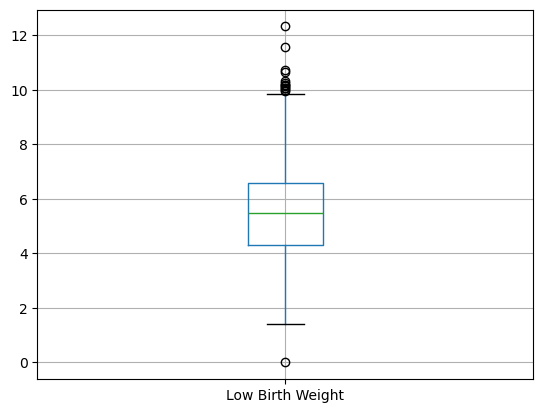

In [47]:
#creating boxplot to display distribution of percentages of low births in LA census tracts
lbw.boxplot(column=['Low Birth Weight'])

In [ ]:
#Boxplot shows what I expected. Out of all the births in each LA census tract, about 5-6% are considered to be low birth weight.

<Axes: xlabel='Low Birth Weight', ylabel='SPA'>

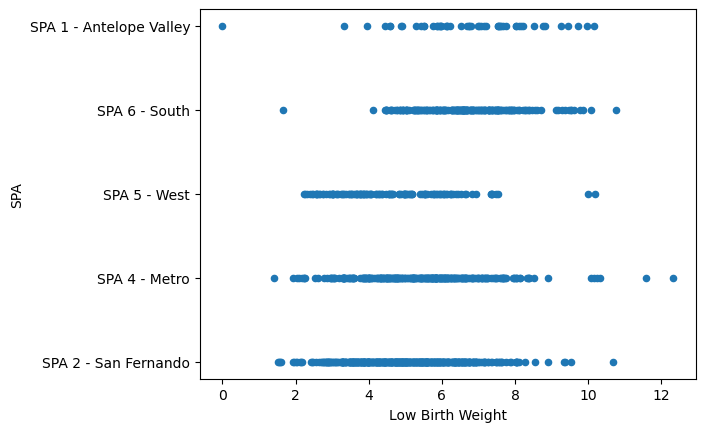

In [43]:
#Creating a scatterplot to show low birth weight in the SPAs.
lbw.plot.scatter(x='Low Birth Weight',y='SPA')

In [48]:
#I want to sort the SPAs in order now
lbw_sorted = lbw.sort_values(by='SPA',ascending = False)

<Axes: xlabel='Low Birth Weight', ylabel='SPA'>

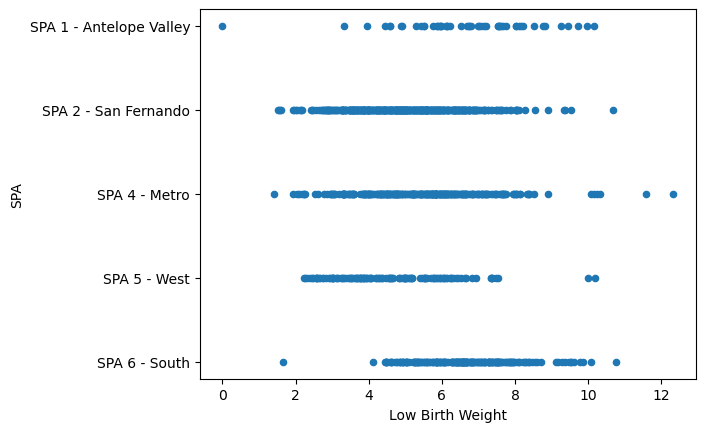

In [49]:
#Redoing the scatterplot so the SPAs are in order
lbw_sorted.plot.scatter(x='Low Birth Weight',y='SPA')

In [ ]:
#Each dot represents the percentage of which births were considered low birth weight.
#It appears that SPAs 1 and 6 have higher percentage of low birth weight births.
#SPA 5, as expected, is on the lower end.

In [50]:
#sorting to see the highest percentages of low birth weights
highlbw = lbw.sort_values(by='Low Birth Weight',ascending = False)

<Axes: title={'center': 'Top 10 SPAs with the Highest Percentages of Low Birth Weight Births'}, ylabel='SPA'>

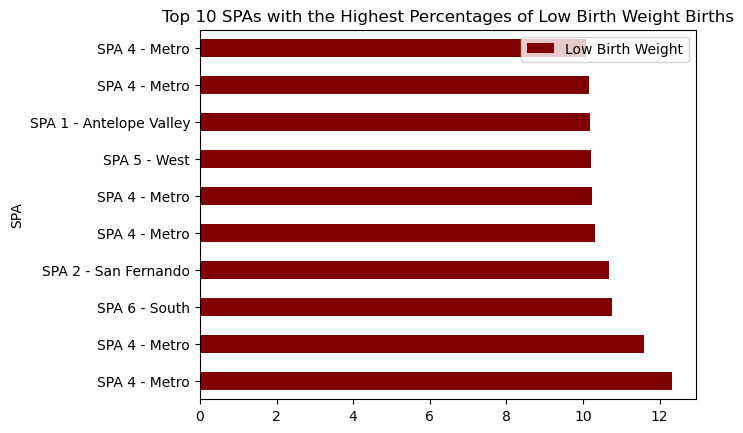

In [62]:
highlbw.head(10).plot.barh(x='SPA',
                            y='Low Birth Weight', 
                            title='Top 10 SPAs with the Highest Percentages of Low Birth Weight Births',
                            color='maroon')

In [ ]:
#SPA 4 is dominating in this chart. This makes sense Downtown LA is in SPA 4.

In [53]:
#Now let's do a bar chart seeing the lowest percentages
lowlbw = lbw.sort_values(by='Low Birth Weight',ascending = True)

<Axes: title={'center': 'Top 10 SPAs with the Lowest Percentages of Low Birth Weight Births'}, ylabel='SPA'>

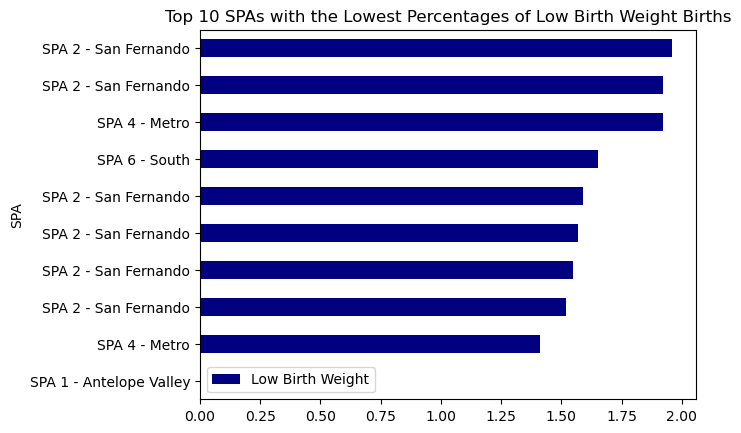

In [60]:
lowlbw.head(10).plot.barh(x='SPA',
                            y='Low Birth Weight', 
                            title='Top 10 SPAs with the Lowest Percentages of Low Birth Weight Births',
                            color='navy')

In [ ]:
#SPA 2 seems to dominate this chart. I was expecting to see more SPA 5.
#In SPA 2, I know there are affluent areas, so I am assuming that is what why we are seeing 
#these results.

<Axes: >

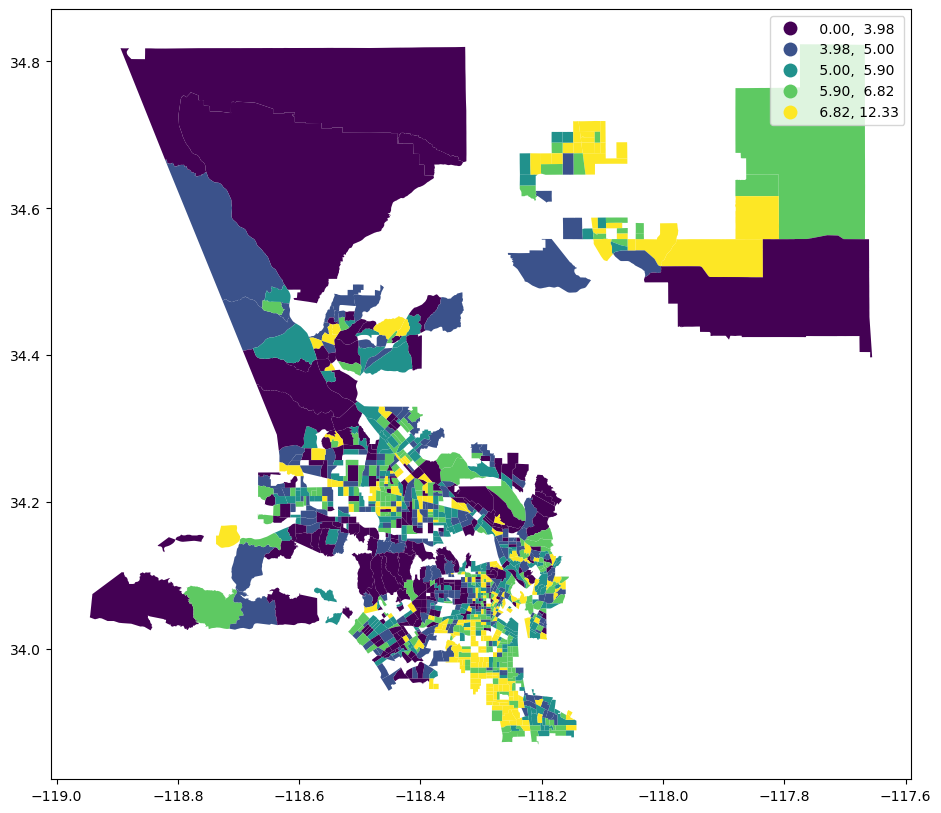

In [11]:
#map time!
lbw.plot(figsize=(12,10),
                 column='Low Birth Weight',
                 legend=True, 
                 scheme='quantiles')

In [12]:
#saving image to download for presentation
plt.savefig('LBW.png')

<Figure size 640x480 with 0 Axes>

In [ ]:
#SPA 1 and SPA 6 seem to have the most births that are considered low weight. This
#is consistent with my other group members' findings in terms of other SES variables.

In [11]:
#Time for a version of that same map except let's 
#make it an interactive map. Importing branca for this.
import branca

colormap = branca.colormap.LinearColormap(
        vmin=lbw["Low Birth Weight"].quantile(0.0),
    vmax=lbw["Low Birth Weight"].quantile(1),
    colors=["red", "orange", "lightblue", "green", "darkgreen"],
    caption="SPA Level Percentages of Low Birth Weight Births",
)

In [12]:
import folium

# Create a map centered around Los Angeles County
m = folium.Map(location=[34.052235, -118.243683], zoom_start=10)

# Define popup and tooltip settings
popup = folium.GeoJsonPopup(
    fields=["Low Birth Weight"],  
    aliases=["% of LBW"],  # Adjusted alias for clarity
    localize=True,
    labels=True,
    style="background-color: yellow;",
)

tooltip = folium.GeoJsonTooltip(
    fields=["Low Birth Weight"],  
    aliases=["% of LBW"],  # Adjusted alias for clarity
    localize=True,
    sticky=False,
    labels=True,
    style="""
        background-color: #F0EFEF;
        border: 2px solid black;
        border-radius: 3px;
        box-shadow: 3px;
    """,
    max_width=800,
)
# Add GeoJson layer
g = folium.GeoJson(
    lbw,
    style_function=lambda x: {
        "fillColor": colormap(x["properties"]["Low Birth Weight"])  # Adjusted to use the correct column name
        if x["properties"]["Low Birth Weight"] is not None
        else "transparent",
        "color": "black",
        "fillOpacity": 0.4,
    },
    tooltip=tooltip,
    popup=popup,
).add_to(m)

# Add colormap/keepingn colors consistent with other group members.
colormap.add_to(m)

# Display the map
m

In [ ]:
###End of Savannah Gourley's portion of midterm.

In [ ]:
#Group Roles:
##Ashley - Data Analyst:
#Identify datasets appropriate for the project, makes graphics to accompany reports whenever needed
##Maya - Project Co-coordinator: 
#Helping to lead the team to make sure we are meeting deadlines + responsible for assessing logistics of assignments & making sure we are where we are supposed to be (assignments are fulfilling key components of assignments’ asks)
##Kiran - Project Co-coordinator: 
#Data management & visualization lead + providing support, maintaining the GitHub repository and other files, coordinating meeting times as well
##Savannah - Data Analyst:
#Conducts analysis and data management on sociodemographic variables across LA SPAs
#Performs literature reviews of other GIS/food insecurity articles to understand what kind of variables to create
##Xander - Data Analyst
#Produce data visualization
#Perform literature & methods review
#Assist with data cleaning